In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [101]:
trials=100_00_00      #total simulated events
low=-1;high=1;interval=high-low
test=interval*np.random.rand(trials,3)+low
#test
x=test[:,0]
y=test[:,1]
z=test[:,2]

In [102]:
x

array([-0.93627571, -0.96363343, -0.41683315, ...,  0.36668368,
       -0.96996705,  0.38310018])

In [103]:
y

array([ 0.07095482, -0.37942545,  0.54737179, ...,  0.27539515,
        0.12400549,  0.50104458])

In [104]:
z

array([-0.31680419,  0.88810694, -0.30087962, ..., -0.7782179 ,
       -0.34473948, -0.15749538])

In [105]:

r=np.sqrt(x**2+y**2+z**2)
r

array([0.99096503, 1.36428993, 0.75092896, ..., 0.90328429, 1.0368504 ,
       0.65008939])

In [106]:
test=np.column_stack((test,r))

In [107]:
df=pd.DataFrame(test,columns=['x','y','z','r']) #data frame with x,y,z and r
df.head()

,x,y,z,r
0,-0.936276,0.070955,-0.316804,0.990965
1,-0.963633,-0.379425,0.888107,1.364290
2,-0.416833,0.547372,-0.300880,0.750929
3,0.752383,-0.148341,0.191025,0.790301
4,0.992445,-0.511467,-0.711349,1.323844


In [108]:
df_less=df[df.r<0.5]          #data frame with r<0.5 (radius of the bead)
df_less.head()
total_counts=df_less.shape[0]
total_counts

65711

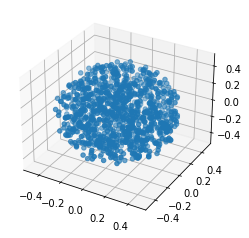

In [109]:
%matplotlib inline
df_sample=df_less.head(1000)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_sample.x,df_sample.y,df_sample.z)

In [110]:
#this function give the normal distance from a point to the surface of the sphere

def get_upward_distance(x,y,z,dz=0.001,r=0.5):
    '''
    returns normal distance from a point in the sphere to the surface as well as the z co-ordinate in the sphere
    '''
    #z=np.abs(z)
    d=np.sqrt(x**2+y**2+z**2)
    if z==-0.5: return 1.0,0.5 #z_up, z
    z_up=0
    #print(f"before while z_up: {z_up}")
    while(d<r):
        z+=dz
        #print(f"Inside while z: {z}")
        z_up+=dz
        d=np.sqrt(x**2+y**2+z**2)
    #print(f"after while z_up: {z_up}")
    return z_up,z
        
    

In [111]:
#distance travelled in the bead

df_less.copy().loc[:,'z_new']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[1],axis=1)
df_less.loc[:,'d_bead']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[0],axis=1)
df_less.head()

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,x,y,z,r,d_bead
11,-0.248184,0.407894,0.043102,0.479406,0.106
34,0.252592,0.384726,-0.130896,0.478488,0.327
77,-0.304179,-0.145183,0.276402,0.435891,0.093
92,0.019635,-0.196977,0.238826,0.310199,0.221
110,0.026899,0.458670,0.027542,0.460283,0.170


In [84]:
#distance travelled in the button
button_thickness=3.0
df_less.loc[:,'d_button']=button_thickness/2.-df_less.loc[:,'z_new'] #Thickness of button is 3 mm and thickness above 0 is 1.5 mm
df_less.head()

,x,y,z,r,z_new,d_bead,d_button
9,-0.001334,-0.001955,-0.001633,0.002875,0.004407,0.502,1.495593
17,-0.000185,-0.002109,-0.000180,0.002125,0.004530,0.501,1.495470
24,0.003318,0.001934,-0.001581,0.004153,0.003209,0.502,1.496791
34,0.000417,0.003295,-0.002932,0.004430,0.003738,0.503,1.496262
52,0.001283,-0.001915,-0.003480,0.004174,0.004440,0.504,1.495560


In [85]:
#changing mm to cm
mm_to_cm=0.1
df_less=df_less*mm_to_cm
df_less.head()

,x,y,z,r,z_new,d_bead,d_button
9,-0.000133,-0.000196,-0.000163,0.000288,0.000441,0.0502,0.149559
17,-0.000018,-0.000211,-0.000018,0.000212,0.000453,0.0501,0.149547
24,0.000332,0.000193,-0.000158,0.000415,0.000321,0.0502,0.149679
34,0.000042,0.000329,-0.000293,0.000443,0.000374,0.0503,0.149626
52,0.000128,-0.000191,-0.000348,0.000417,0.000444,0.0504,0.149556


$ P_{transmission} = e^{-\frac{x}{\lambda}} $ <br>

x is thickness and $\lambda$ is attenuation length
<br> $\lambda = \frac{1}{\rho \cdot \mu} $ <br>
$ P_{transmission} = e^{-\mu \cdot \rho \cdot x} $ <br>

$ \mu $ ($cm^2/g$) <br> $ \rho $ ($g/cm^3$) <br> $\lambda (cm)$ <br>
$ \mu$ from https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html
<br>
Tranmission factor from: https://www.ezag.com/home/products/isotope_products/isotrak_calibration_sources/reference_sources/gamma_sources/point_sources/#c601

# fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"")
# ceramic: O7410-Na300-Ca60-Mg10-Al600-Si1600-Pb4


![image](beadcomposition.png)

In [86]:
#Probabality of scatering from the button

button_density = 1.10         #.18        #g/cm^3 (from simulation data)
#button_mu_pb   = 0.1976       #C5H8O2 for 47keV (0.047 MeV) gamma rays
bead_mu_pb     = 3.195E-01    #47 keV pb-21O for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4
bead_mu_am     = 2.314E-01    #60 keV am-241 for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4

button_mu_pb =    1.797E-01     #C870O98N32
button_mu_am =    1.669E-01     #60 keV Am-241



#trnasmission factors from manufacturer
transmission_pb=0.964   #47 keV pb-210

transmission_am=0.958   #60 keV am-241

#Am-241 0.958


#button_mu_am=0.1815    #60 keV am-241
#lambda calculation for acrylic button  (C5H802)
#fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"");
#density is from oldmc




def transmission_prob(x,mu,rho):
    '''reutrns button transmission probability'''
    #return (1-np.exp(-1.0*x*mu*rho))
    return (np.exp(-1.0*x*mu*rho))

    
    
    

In [88]:
#adding the transmississin though button
df_less.loc[:,'button_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_button'],button_mu_pb,button_density),axis=1)
df_less.loc[:,'button_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_button'],button_mu_am,button_density),axis=1)
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am
9,-0.000133,-0.000196,-0.000163,0.000288,0.000441,0.0502,0.149559,0.970869,0.972916
17,-0.000018,-0.000211,-0.000018,0.000212,0.000453,0.0501,0.149547,0.970872,0.972918
24,0.000332,0.000193,-0.000158,0.000415,0.000321,0.0502,0.149679,0.970846,0.972895
34,0.000042,0.000329,-0.000293,0.000443,0.000374,0.0503,0.149626,0.970857,0.972904
52,0.000128,-0.000191,-0.000348,0.000417,0.000444,0.0504,0.149556,0.970870,0.972917


In [89]:
#creating the random number bewteen 0 and 1, if the prob_product is greater than random number add 1 else add 0
def random_assign(x):
    if x>np.random.rand():
        return 1
    return 0
    

In [91]:
#adding the transmississin though button
bead_density=2.55#g/cm^3  
df_less.loc[:,'bead_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
df_less.loc[:,'bead_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am
9,-0.000133,-0.000196,-0.000163,0.000288,0.000441,0.0502,0.149559,0.970869,0.972916,0.959926,0.970813
17,-0.000018,-0.000211,-0.000018,0.000212,0.000453,0.0501,0.149547,0.970872,0.972918,0.960004,0.970870
24,0.000332,0.000193,-0.000158,0.000415,0.000321,0.0502,0.149679,0.970846,0.972895,0.959926,0.970813
34,0.000042,0.000329,-0.000293,0.000443,0.000374,0.0503,0.149626,0.970857,0.972904,0.959848,0.970756
52,0.000128,-0.000191,-0.000348,0.000417,0.000444,0.0504,0.149556,0.970870,0.972917,0.959769,0.970698


In [96]:
N_generated=df_less.shape[0]
#df_less['N_emitted']=df_less['button_transmission_prob']*df_less['bead_transmission_prob']*N_generated
df_less['prob_product_pb']=df_less['button_transmission_prob_pb']*df_less['bead_transmission_prob_pb']
df_less['prob_product_am']=df_less['button_transmission_prob_am']*df_less['bead_transmission_prob_am']
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am,prob_product_pb,prob_product_am
9,-0.000133,-0.000196,-0.000163,0.000288,0.000441,0.0502,0.149559,0.970869,0.972916,0.959926,0.970813,0.931963,0.944519
17,-0.000018,-0.000211,-0.000018,0.000212,0.000453,0.0501,0.149547,0.970872,0.972918,0.960004,0.970870,0.932041,0.944577
24,0.000332,0.000193,-0.000158,0.000415,0.000321,0.0502,0.149679,0.970846,0.972895,0.959926,0.970813,0.931941,0.944499
34,0.000042,0.000329,-0.000293,0.000443,0.000374,0.0503,0.149626,0.970857,0.972904,0.959848,0.970756,0.931874,0.944452
52,0.000128,-0.000191,-0.000348,0.000417,0.000444,0.0504,0.149556,0.970870,0.972917,0.959769,0.970698,0.931811,0.944408


In [97]:
#avg_of_prob_pb=round(df_less['prob_product_pb'].mean(),3)
avg_of_prob_am=round(df_less['prob_product_am'].mean(),3)
avg_of_prob_am

0.945

In [98]:
avg_random=round(df_less['prob_product_am'].apply(lambda x:random_assign(x)).mean(),3)
avg_random

0.905

# IGNORE BELOW THIS

In [99]:
def get_prob_am(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead for am-241
    '''
    df_less['bead_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
    df_less['prob_product_am']=df_less['button_transmission_prob_am']*df_less['bead_transmission_prob_am']
    avg_prob_am=round(df_less['prob_product_am'].mean(),3)
    return [bead_density,avg_prob_am]
def get_prob_pb(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead for pb-210
    '''
    df_less['bead_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
    df_less['prob_product_pb']=df_less['button_transmission_prob_pb']*df_less['bead_transmission_prob_pb']
    avg_prob_am=round(df_less['prob_product_pb'].mean(),3)
    return [bead_density,avg_prob_am]

In [100]:
print(f"Prob of am {transmission_am}\n")
density_prob=[]
for i in np.arange(0,10,0.05):
    test=get_prob_am(i)
    density_prob.append(test)
    print(f"test :{test}")
#df_less.head()
    

Prob of am 0.958

test :[0.0, 0.973]
test :[0.05, 0.972]
test :[0.1, 0.972]
test :[0.15000000000000002, 0.971]
test :[0.2, 0.971]
test :[0.25, 0.97]
test :[0.30000000000000004, 0.97]
test :[0.35000000000000003, 0.969]
test :[0.4, 0.968]
test :[0.45, 0.968]
test :[0.5, 0.967]
test :[0.55, 0.967]
test :[0.6000000000000001, 0.966]
test :[0.65, 0.966]
test :[0.7000000000000001, 0.965]
test :[0.75, 0.964]
test :[0.8, 0.964]
test :[0.8500000000000001, 0.963]
test :[0.9, 0.963]
test :[0.9500000000000001, 0.962]
test :[1.0, 0.962]
test :[1.05, 0.961]
test :[1.1, 0.961]
test :[1.1500000000000001, 0.96]
test :[1.2000000000000002, 0.959]
test :[1.25, 0.959]
test :[1.3, 0.958]
test :[1.35, 0.958]
test :[1.4000000000000001, 0.957]
test :[1.4500000000000002, 0.957]
test :[1.5, 0.956]
test :[1.55, 0.956]
test :[1.6, 0.955]
test :[1.6500000000000001, 0.954]
test :[1.7000000000000002, 0.954]
test :[1.75, 0.953]
test :[1.8, 0.953]
test :[1.85, 0.952]
test :[1.9000000000000001, 0.952]
test :[1.9500000000

In [34]:
print(f"Prob of pb\n")
density_prob=[]
for i in np.arange(0,4,0.05):
    test=get_prob_pb(i)
    density_prob.append(test)
    print(f"test :{test}")
#df_less.head()
    

Prob of pb

test :[0.0, 0.972]
test :[0.05, 0.971]
test :[0.1, 0.971]
test :[0.15000000000000002, 0.971]
test :[0.2, 0.971]
test :[0.25, 0.971]
test :[0.30000000000000004, 0.971]
test :[0.35000000000000003, 0.971]
test :[0.4, 0.971]
test :[0.45, 0.971]
test :[0.5, 0.971]
test :[0.55, 0.971]
test :[0.6000000000000001, 0.971]
test :[0.65, 0.971]
test :[0.7000000000000001, 0.971]
test :[0.75, 0.971]
test :[0.8, 0.971]
test :[0.8500000000000001, 0.971]
test :[0.9, 0.97]
test :[0.9500000000000001, 0.97]
test :[1.0, 0.97]
test :[1.05, 0.97]
test :[1.1, 0.97]
test :[1.1500000000000001, 0.97]
test :[1.2000000000000002, 0.97]
test :[1.25, 0.97]
test :[1.3, 0.97]
test :[1.35, 0.97]
test :[1.4000000000000001, 0.97]
test :[1.4500000000000002, 0.97]
test :[1.5, 0.97]
test :[1.55, 0.97]
test :[1.6, 0.97]
test :[1.6500000000000001, 0.97]
test :[1.7000000000000002, 0.97]
test :[1.75, 0.969]
test :[1.8, 0.969]
test :[1.85, 0.969]
test :[1.9000000000000001, 0.969]
test :[1.9500000000000002, 0.969]
test 

In [ ]:
for i in np.linspace(0,1,0.1):
    test=get_prob(i)
    print(f"test :{test}")

In [ ]:
get_prob(0.3)

In [ ]:
avg_prob=round(df_less['prob_product'].mean(),3)
avg_prob

In [ ]:
prob=get_prob(0.1)

In [ ]:
prob

In [ ]:
for i in range(0.1,10.0,0.1):
    prob=get_prob(i)
    print(f"prob: {prob}")